In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from geopy.geocoders import Nominatim
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Store the dataset in a dataframe
fies_df = pd.read_csv('2021FIESvol1_puf.csv', low_memory=False)


In [3]:
fies_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQUENCE_NO                   165029 non-null  int64  
 3   FSIZE                         165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

In [4]:
food_prices_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188188 entries, 0 to 188187
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       188188 non-null  object 
 1   admin1     188188 non-null  object 
 2   admin2     188188 non-null  object 
 3   market     188188 non-null  object 
 4   latitude   188188 non-null  float64
 5   longitude  188188 non-null  float64
 6   category   188188 non-null  object 
 7   commodity  188188 non-null  object 
 8   unit       188188 non-null  object 
 9   priceflag  188188 non-null  object 
 10  pricetype  188188 non-null  object 
 11  currency   188188 non-null  object 
 12  price      188188 non-null  float64
 13  usdprice   188188 non-null  float64
dtypes: float64(4), object(10)
memory usage: 20.1+ MB


In [5]:
#df.drop(['Region', 'State', 'City'], axis=1, inplace=True)

new_df = fies_df[['W_REGN','FSIZE','WAGES','BREAD','MEAT','FISH','OIL','FOOD_HOME']]
new_df

,W_REGN,FSIZE,WAGES,BREAD,MEAT,FISH,OIL,FOOD_HOME
0,1,6.5,290000,37359,43748,15988,3445,167505
1,1,4.0,152000,22820,25551,10878,1230,103440
2,1,1.0,0,9321,10740,7268,1545,53431
3,1,3.0,0,16770,16100,6232,1840,73295
4,1,4.0,92400,23325,23171,8812,1840,86148
...,...,...,...,...,...,...,...,...
165024,17,1.0,0,6587,934,2704,360,17549
165025,17,5.0,0,24915,2511,26684,720,66519
165026,17,3.0,109950,14806,2028,4566,720,32673
165027,17,8.0,3600,34016,2619,17686,720,69150


In [6]:
region_mapping = {
    1: 'Ilocos Region',
    2: 'Cagayan Valley',
    3: 'Central Luzon',
    4: 'CALABARZON',
    5: 'Bicol Region',
    6: 'Western Visayas',
    7: 'Central Visayas',
    8: 'Eastern Visayas',
    9: 'Zamboanga Peninsula',
    10: 'Northern Mindanao',
    11: 'Davao Region',
    12: 'SOCCSKSARGEN',
    13: 'NCR',
    14: 'CAR',
    15: 'ARMM',
    16: 'Caraga',
    17: 'MIMAROPA',
}

# Replace numbers with region names
new_df['W_REGN'] = new_df['W_REGN'].replace(region_mapping)

C:\Users\URIELG~1\AppData\Local\Temp/ipykernel_25444/402690871.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['W_REGN'] = new_df['W_REGN'].replace(region_mapping)


In [7]:
new_df

,W_REGN,FSIZE,WAGES,BREAD,MEAT,FISH,OIL,FOOD_HOME
0,Ilocos Region,6.5,290000,37359,43748,15988,3445,167505
1,Ilocos Region,4.0,152000,22820,25551,10878,1230,103440
2,Ilocos Region,1.0,0,9321,10740,7268,1545,53431
3,Ilocos Region,3.0,0,16770,16100,6232,1840,73295
4,Ilocos Region,4.0,92400,23325,23171,8812,1840,86148
...,...,...,...,...,...,...,...,...
165024,MIMAROPA,1.0,0,6587,934,2704,360,17549
165025,MIMAROPA,5.0,0,24915,2511,26684,720,66519
165026,MIMAROPA,3.0,109950,14806,2028,4566,720,32673
165027,MIMAROPA,8.0,3600,34016,2619,17686,720,69150


# Average Amount Spent on Food by Region per Year

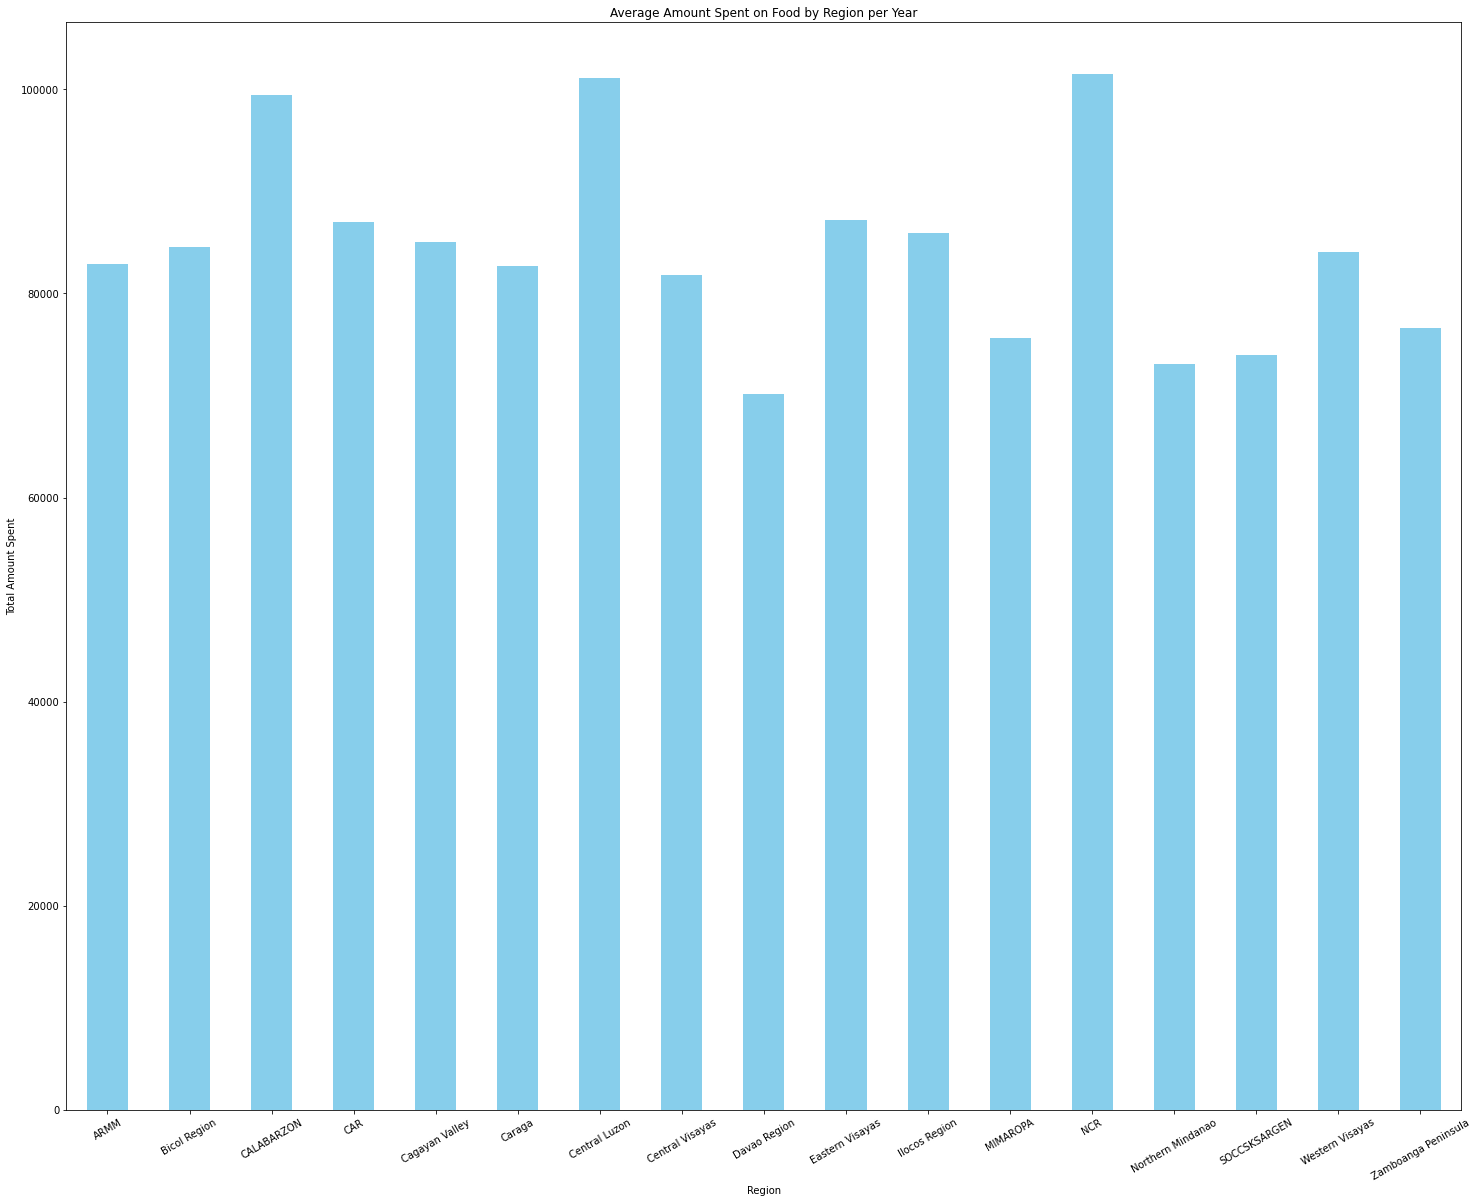

In [63]:
total_spending_by_region = new_df.groupby('W_REGN')['FOOD_HOME'].mean()
#total_spending_by_region

# Creating a bar plot
plt.figure(figsize=(25, 20))
total_spending_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Amount Spent on Food by Region per Year')
plt.xlabel('Region')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=30)
plt.show()

# Amount Spent on Food (per Category) by Region

<Figure size 1440x1440 with 0 Axes>

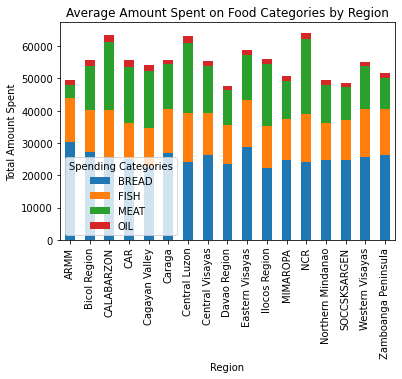

In [62]:
spending_categories = ['BREAD', 'FISH', 'MEAT', 'OIL']
spending_df = new_df.groupby('W_REGN')[spending_categories].mean()

# Creating a stacked bar plot
plt.figure(figsize=(20, 20))  # Adjust the figsize as needed
spending_df.plot(kind='bar', stacked=True)
plt.title('Average Amount Spent on Food Categories by Region')
plt.xlabel('Region')
plt.ylabel('Total Amount Spent')
plt.legend(title='Spending Categories')
#plt.tight_layout()  # Helps prevent elements from being cut off
plt.show()

# Average Amount Spent on Food by Region

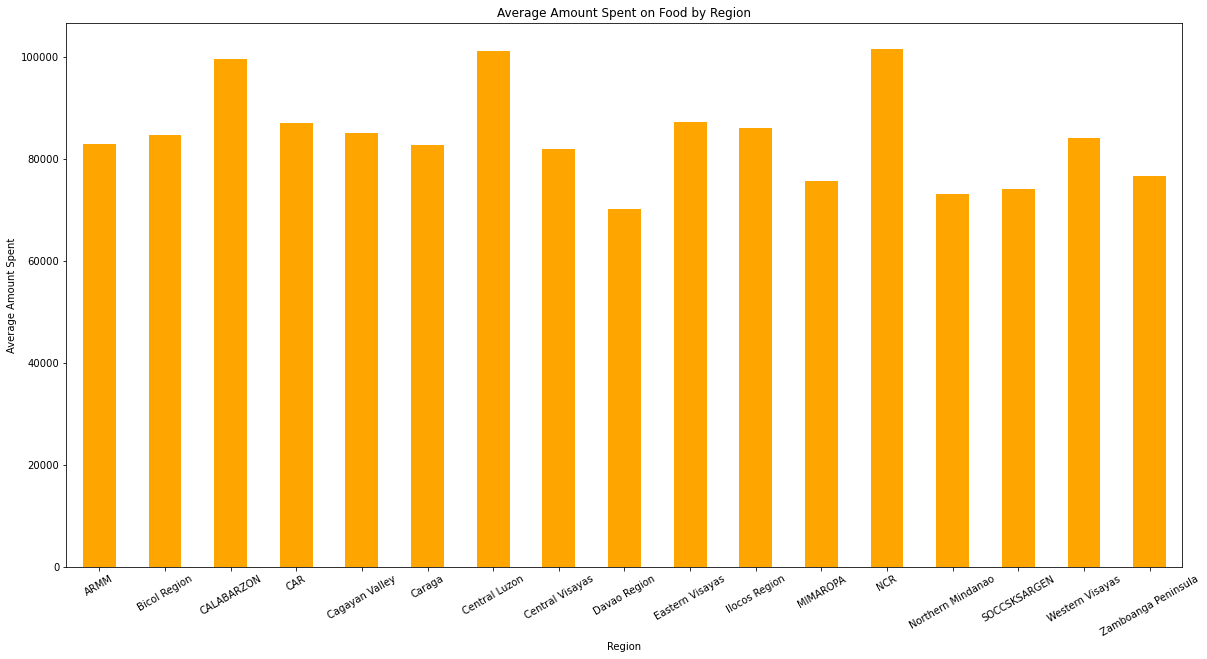

In [65]:
average_spending_by_region = new_df.groupby('W_REGN')['FOOD_HOME'].mean()

# Creating a grouped bar plot
plt.figure(figsize=(20, 10))
average_spending_by_region.plot(kind='bar', color='orange')
plt.title('Average Amount Spent on Food by Region')
plt.xlabel('Region')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=30)
plt.show()

# Family Size 

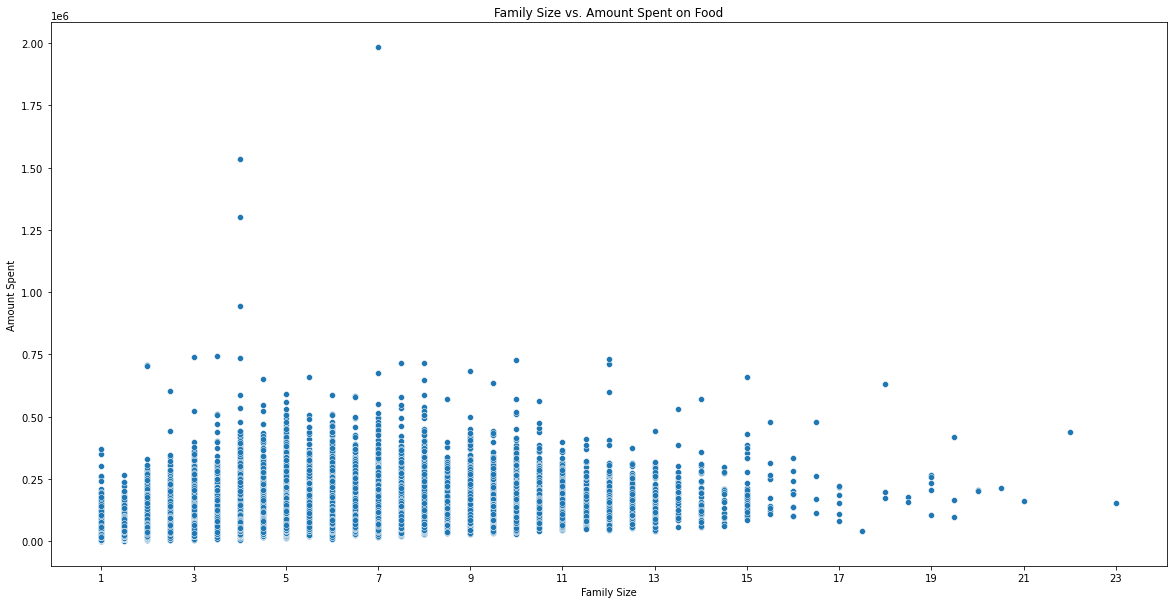

In [64]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='FSIZE', y='FOOD_HOME', data=new_df)
plt.title('Family Size vs. Amount Spent on Food')
plt.xlabel('Family Size')
plt.ylabel('Amount Spent')

# Customize x-axis ticks
custom_x_ticks = range(int(min(new_df['FSIZE'])), int(max(new_df['FSIZE'])) + 1, 2)
plt.xticks(custom_x_ticks)

plt.show()

In [12]:
# Calculate correlation coefficient
correlation_coefficient = new_df['FSIZE'].corr(fies_df['FOOD_HOME'])
print(f"Correlation coefficient: {correlation_coefficient:.2f}")

Correlation coefficient: 0.45


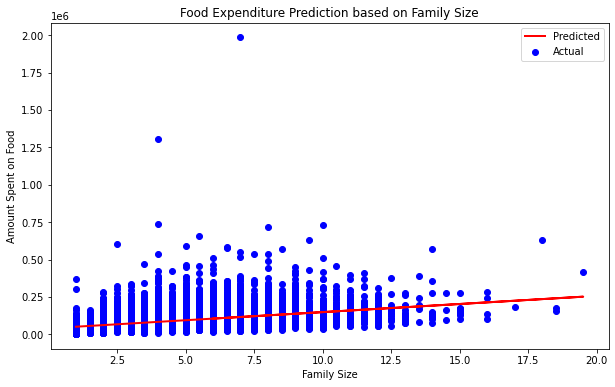

In [56]:
# Choose the predictor variable (independent variable)
X = new_df[['FSIZE']]

# Choose the target variable (dependent variable)
y = new_df['FOOD_HOME']  # Replace with the actual column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Food Expenditure Prediction based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Amount Spent on Food')
plt.legend()
plt.show()

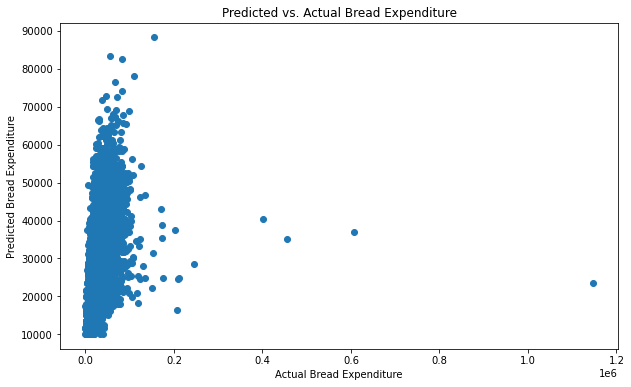

In [59]:
X = new_df[['FSIZE', 'W_REGN']]  

# Choose the target variable (dependent variable)
y = new_df['BREAD']  # Replace with the actual column name

# Convert categorical feature 'REGION' into numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['W_REGN'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Bread Expenditure')
plt.xlabel('Actual Bread Expenditure')
plt.ylabel('Predicted Bread Expenditure')
plt.show()